<a href="https://www.kaggle.com/code/alimtharwat/loan-approval-dataset-analysis?scriptVersionId=246888267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Team Members and IDs: Michael Danial 13004528, Ali Tharwat 13004222,
                       Sherif Tamer 13004065

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display


df = pd.read_csv('/kaggle/input/loan-approval-dataset/loan_approval_dataset.csv')

#Dataset analysis and preparation tasks
#a

#Displaying the first 12 rows of the dataset(the head)
print("First 12 rows:")
display(df.head(12))

#Displaying the last 12 rows of the dataset(the tail)
print("Last 12 rows:")
display(df.tail(12))

First 12 rows:


,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,1,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,2,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,3,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,4,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,5,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0
5,6,25,32905,449,6320,24,7.46,Unemployed,32.47,Single,0,Own,Education,0
6,7,38,141759,445,356187,72,9.19,Self-Employed,30.17,Married,2,Rent,Personal,0
7,8,56,175423,598,306065,24,10.35,Employed,9.34,Widowed,4,Mortgage,Car,0
8,9,36,50981,466,11589,24,14.02,Self-Employed,40.95,Married,2,Rent,Business,0
9,10,40,93903,347,462625,48,4.73,Employed,48.79,Widowed,4,Own,Education,0


Last 12 rows:


,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
4988,4989,42,108697,430,296694,24,4.40,Unemployed,9.28,Single,4,Rent,Car,0
4989,4990,62,183945,447,484367,12,3.08,Self-Employed,6.04,Married,4,Mortgage,Personal,1
4990,4991,45,121505,680,401792,60,9.23,Employed,29.69,Widowed,2,Own,Education,0
4991,4992,18,100720,408,45868,72,5.44,Self-Employed,15.10,Single,2,Mortgage,Car,0
4992,4993,66,98199,420,103039,36,6.26,Employed,8.55,Widowed,4,Own,Education,0
4993,4994,62,176390,594,182452,12,5.56,Self-Employed,37.84,Single,1,Mortgage,Home,0
4994,4995,21,53734,419,403944,48,10.63,Self-Employed,27.41,Widowed,0,Mortgage,Personal,1
4995,4996,24,169594,755,299944,48,9.42,Self-Employed,40.83,Married,1,Mortgage,Home,0
4996,4997,66,162728,829,15886,24,3.47,Unemployed,34.88,Married,1,Own,Education,0
4997,4998,26,166965,468,477830,48,9.08,Self-Employed,37.84,Married,4,Own,Business,0


In [2]:
#b
#Printing the total number of columns and the total number of rows
print("Total Rows and Columns:", df.shape)

Total Rows and Columns: (5000, 14)


In [3]:
#c
#Printing the name of each feature and their corresponding data type
print("Column Names and Data Types:")
print(df.dtypes)

Column Names and Data Types:
Applicant_ID              int64
Age                       int64
Income                    int64
Credit_Score              int64
Loan_Amount               int64
Loan_Term                 int64
Interest_Rate           float64
Employment_Status        object
Debt_to_Income_Ratio    float64
Marital_Status           object
Number_of_Dependents      int64
Property_Ownership       object
Loan_Purpose             object
Previous_Defaults         int64
dtype: object


In [4]:
#d
#Printing the name of the first feature
print("First Column Name:", df.columns[0])

First Column Name: Applicant_ID


In [5]:
#e
#Shows non-null counts and data types of each column ,It has 5,000 rows which are indexed from 0 to 4999.It has 14 columns.
print("Dataset Summary:")
print(df.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 547.0+

In [6]:
#f
#We have chosen the 'Age' attribute and have displayed it's distinct values.(no duplicates)
categorical_column = 'Age'
print(f"Distinct values in '{categorical_column}':", df[categorical_column].unique())

Distinct values in 'Age': [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]


In [7]:
#g
#Displaying the most occuring value for the 'Age' attribute which is 64.
mfv = df[categorical_column].mode()[0]
print(f"\nMost frequently occurring value in '{categorical_column}':", mfv)



Most frequently occurring value in 'Age': 64


In [8]:
#h
#Note:all following functions display numeric values only
print("Statistical Summary: \n")
#Displaying the mean(average) for each attribute
print("Mean:\n\n", df.mean(numeric_only=True))
#Displaying the median value for each attribute
print("\nMedian:\n\n", df.median(numeric_only=True))
#Displaying standard deviation(a measure of how much the values in a dataset deviate(spread out) from the mean).
print("\nStandard Deviation:\n\n", df.std(numeric_only=True))
#Displaying the 25th percentile (Q1), 50th percentile (Median or Q2), and 75th percentile (Q3)
print("\nPercentiles:\n\n", df.quantile([0.25, 0.5, 0.75], numeric_only=True))

Statistical Summary: 

Mean:

 Applicant_ID              2500.500000
Age                         43.584600
Income                  110220.247000
Credit_Score               574.183200
Loan_Amount             252118.479000
Loan_Term                   41.769600
Interest_Rate                8.873018
Debt_to_Income_Ratio        27.177244
Number_of_Dependents         2.010200
Previous_Defaults            0.099400
dtype: float64

Median:

 Applicant_ID              2500.50
Age                         43.00
Income                  110180.50
Credit_Score               573.00
Loan_Amount             250846.50
Loan_Term                   36.00
Interest_Rate                8.90
Debt_to_Income_Ratio        27.22
Number_of_Dependents         2.00
Previous_Defaults            0.00
dtype: float64

Standard Deviation:

 Applicant_ID              1443.520003
Age                         14.919094
Income                   52075.384023
Credit_Score               160.437715
Loan_Amount             142580.00

In [9]:
#Data preparation tasks

#a
#Selecting Rows with Loan Amount more than 498000
filtered_df = df[df['Loan_Amount'] > 498000]
print("Filtered Data:\n", filtered_df)

Filtered Data:
       Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
481            482   34   95324           711       499361         36   
788            789   65  137449           750       498657         36   
1695          1696   46  175666           371       498466         48   
2123          2124   62   68665           385       499275         72   
2130          2131   46  144069           844       498213         48   
2339          2340   18   98282           312       498644         24   
2370          2371   23   55525           432       498938         12   
2412          2413   43   55897           311       499150         72   
2479          2480   28   80942           563       498936         60   
2733          2734   48  131001           303       498062         48   
2765          2766   23  193353           562       498598         36   
2856          2857   65   20654           649       499651         72   
2996          2997   52  166895    

In [10]:
#b
if 'Marital_Status' in df.columns:
    count_S = df[df['Marital_Status'].str.startswith('S', na=False)].shape[0]
    print(f"Number of records where 'Marital Status' starts with 'S': {count_S}")
else:
    print("No 'Marital_Status' column found.")


Number of records where 'Marital Status' starts with 'S': 1225


In [11]:
#c

# count duplicated rows
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)

# remove duplicated rows
df = df.drop_duplicates()

Total duplicate rows: 0


In [12]:
#d

#converting Credit_Score from integer to string
df['Credit_Score'] = df['Credit_Score'].astype(str)
print("Updated data types:\n", df.dtypes)


Updated data types:
 Applicant_ID              int64
Age                       int64
Income                    int64
Credit_Score             object
Loan_Amount               int64
Loan_Term                 int64
Interest_Rate           float64
Employment_Status        object
Debt_to_Income_Ratio    float64
Marital_Status           object
Number_of_Dependents      int64
Property_Ownership       object
Loan_Purpose             object
Previous_Defaults         int64
dtype: object


In [13]:
#e
# grouping data by : Property_Ownership &  Marital_Status
grouped = df.groupby(['Property_Ownership', 'Marital_Status']).size()
print("Grouped Data:\n", grouped)

#some analysis for the data :
# counts range between 391 and 436 , making them a nearly uniform distribution
# no single combination dominates the dataset, and all groups are well-represented.

Grouped Data:
 Property_Ownership  Marital_Status
Mortgage            Divorced          410
                    Married           422
                    Single            414
                    Widowed           422
Own                 Divorced          412
                    Married           436
                    Single            411
                    Widowed           423
Rent                Divorced          391
                    Married           426
                    Single            400
                    Widowed           433
dtype: int64


In [14]:
#f
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64


In [15]:
#g
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical data
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical data
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values after change:\n", df.isnull().sum())


Missing values after change:
 Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64


/tmp/ipykernel_35/2418862376.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_35/2418862376.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [16]:
#h
df['Income_Bins'] = pd.cut(df['Income'], bins=5)
print(df['Income_Bins'].value_counts())


Income_Bins
(92013.6, 128006.4]     1029
(163999.2, 199992.0]    1019
(19848.036, 56020.8]    1008
(128006.4, 163999.2]     982
(56020.8, 92013.6]       962
Name: count, dtype: int64


In [17]:
#i
max_row = df[df['Credit_Score'] == df['Credit_Score'].max()]
print("Row with maximum credit score:\n", max_row)


Row with maximum credit score:
       Applicant_ID  Age  Income Credit_Score  Loan_Amount  Loan_Term  \
188            189   28  127216          849       294965         72   
332            333   58  172711          849       307574         72   
530            531   50   81169          849        92844         12   
547            548   33   39404          849       412202         72   
952            953   43   40922          849       273362         72   
1075          1076   47  164771          849        22352         72   
1316          1317   19  110071          849       406345         36   
1788          1789   26   77174          849       190385         24   
1935          1936   43  197583          849       291487         48   
2697          2698   64  118322          849       186854         72   
2724          2725   31   38667          849       163516         12   
3220          3221   23   87600          849       487112         24   
3919          3920   54  160790 

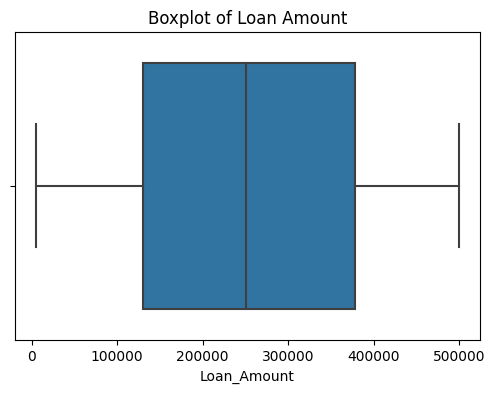

In [18]:
#j
# we chose the Loan_Amount as is a critical factor in the loan approval process.
# it directly impacts the borrower's ability to repay the loan and the lender's risk assessment.

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Loan_Amount'].astype(float))
plt.title("Boxplot of Loan Amount")
plt.show()


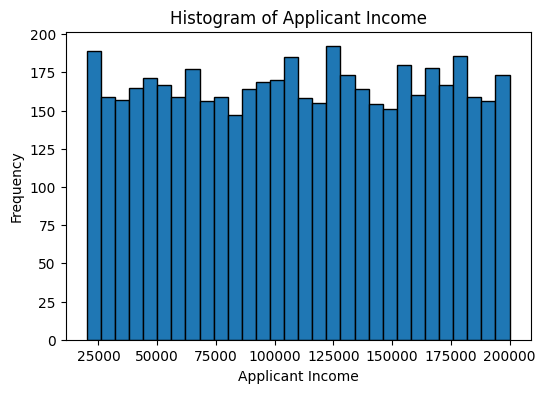

In [19]:
#k
plt.figure(figsize=(6, 4))
plt.hist(df['Income'], bins=30, edgecolor='black')
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.title("Histogram of Applicant Income")
plt.show()

#For the Income attribute, a histogram helps visualize:
#The central tendency(where most incomes lie) , range of incomes , shape of the distribution , etc


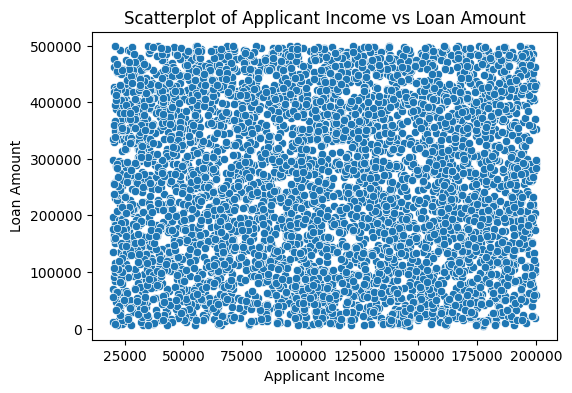

In [20]:
#l
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Income'], y=df['Loan_Amount'].astype(float))
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Scatterplot of Applicant Income vs Loan Amount")
plt.show()

#The scatterplot shows a positive relationship between applicant income and loan amount
# indicating that higher-income applicants tend to request larger loans.

In [21]:
#m
scaler = StandardScaler()
df_scaled = df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Standardized Data:\n", df_scaled.head())

Standardized Data:
    Applicant_ID       Age    Income Credit_Score  Loan_Amount  Loan_Term  \
0     -1.731704  0.832265 -1.695793          639     1.407277   1.467723   
1     -1.731012  1.703719  0.305372          655     0.035180   0.885108   
2     -1.730319  0.161916 -0.256351          467    -0.180138   1.467723   
3     -1.729626 -0.776573 -0.174538          751     0.409366  -1.445350   
4     -1.728933  1.100405 -1.692471          404    -1.676760  -1.445350   

   Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
0      -1.198974        Unemployed              1.254939        Married   
1      -0.964315        Unemployed             -1.300293       Divorced   
2      -1.494368     Self-Employed              1.413235       Divorced   
3       1.415402        Unemployed             -1.443069         Single   
4       0.070945     Self-Employed             -0.502607       Divorced   

   Number_of_Dependents Property_Ownership Loan_Purpose  Previous_Defaul

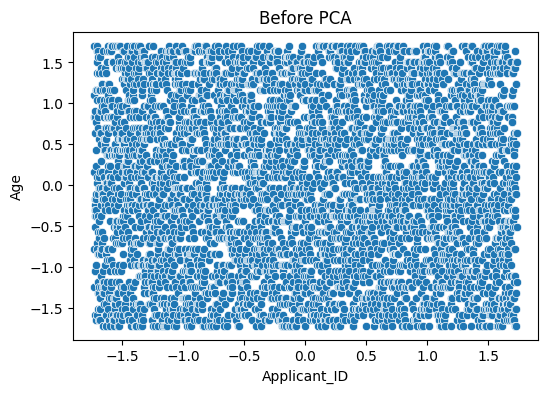

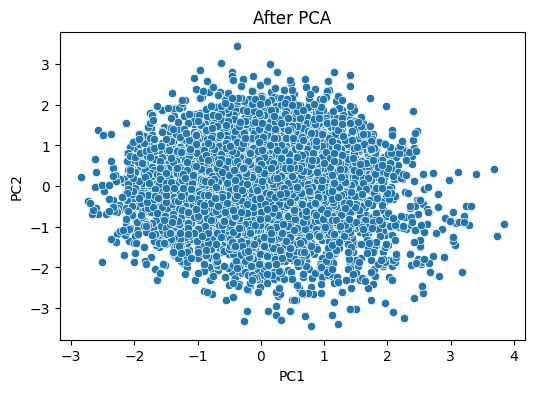

In [22]:
#n
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled[numeric_cols])

# Convert to DataFrame
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Scatterplot before PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_scaled[numeric_cols[0]], y=df_scaled[numeric_cols[1]])
plt.title("Before PCA")
plt.show()

# Scatterplot after PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.title("After PCA")
plt.show()

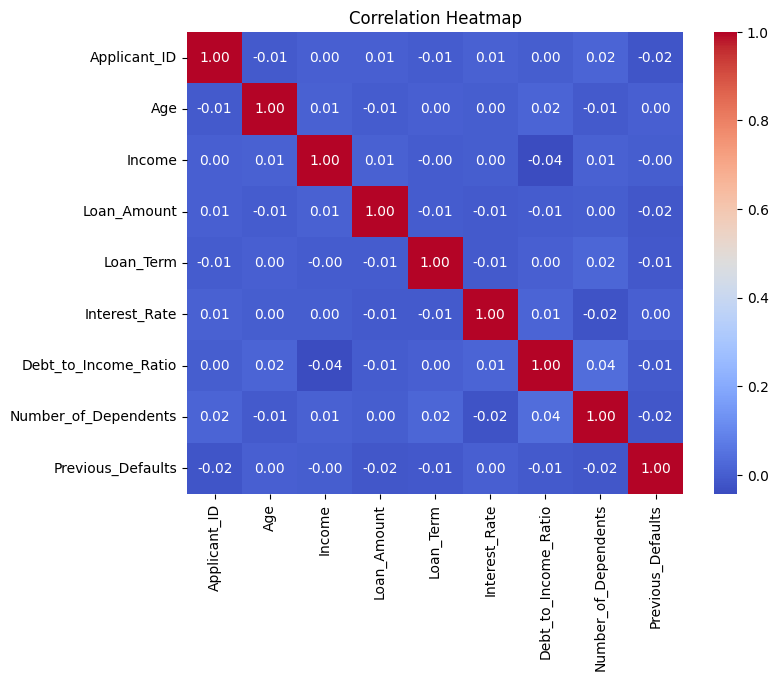

In [23]:
#o
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [24]:
#Practical analytical questions

#a
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
display(correlation_matrix.style.background_gradient(cmap="coolwarm").format(precision=2))


# analysis :all our correlations are very weak correlations

# however Loan_Amount and Income are potential features relevant for classification

Correlation Matrix:


,Applicant_ID,Age,Income,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Number_of_Dependents,Previous_Defaults
Applicant_ID,1.00,-0.01,0.00,0.01,-0.01,0.01,0.00,0.02,-0.02
Age,-0.01,1.00,0.01,-0.01,0.00,0.00,0.02,-0.01,0.00
Income,0.00,0.01,1.00,0.01,-0.00,0.00,-0.04,0.01,-0.00
Loan_Amount,0.01,-0.01,0.01,1.00,-0.01,-0.01,-0.01,0.00,-0.02
Loan_Term,-0.01,0.00,-0.00,-0.01,1.00,-0.01,0.00,0.02,-0.01
Interest_Rate,0.01,0.00,0.00,-0.01,-0.01,1.00,0.01,-0.02,0.00
Debt_to_Income_Ratio,0.00,0.02,-0.04,-0.01,0.00,0.01,1.00,0.04,-0.01
Number_of_Dependents,0.02,-0.01,0.01,0.00,0.02,-0.02,0.04,1.00,-0.02
Previous_Defaults,-0.02,0.00,-0.00,-0.02,-0.01,0.00,-0.01,-0.02,1.00


Class Distribution:
 Employment_Status
Self-Employed    1723
Employed         1666
Unemployed       1611
Name: count, dtype: int64


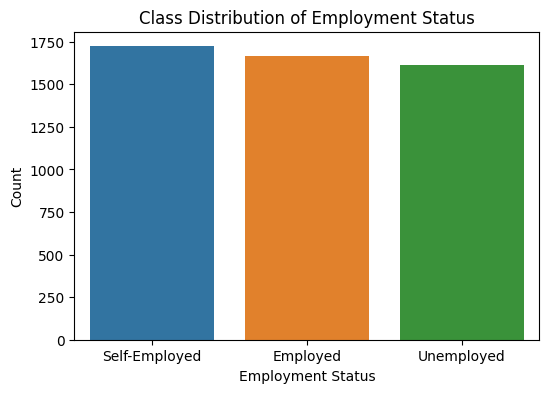

In [25]:
#b
if 'Employment_Status' in df.columns:
    class_distribution = df['Employment_Status'].value_counts()
    print("Class Distribution:\n", class_distribution)

    # Visualizing the distribution
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_distribution.index, y=class_distribution.values)
    plt.xlabel("Employment Status")
    plt.ylabel("Count")
    plt.title("Class Distribution of Employment Status")
    plt.show()
else:
    print("Column 'Employment_Status' not found. Choose another categorical column.")

# The class distribution shows that the dataset is balanced fairly across the three employment status


In [26]:
#c
# 1. Creating 'Income-to-Loan Ratio' (higher values might indicate better repayment capacity)
df['Income_to_Loan_Ratio'] = df['Income'] / df['Loan_Amount'].replace(0, np.nan)
# 2. Creating 'EMI' (Equated Monthly Installment) to assess financial burden
df['EMI'] = df['Loan_Amount'].replace(0, np.nan) / df['Loan_Term'].replace(0, np.nan)
new_features = ['Income_to_Loan_Ratio', 'EMI']
print("Newly Created Features:\n", df[new_features].head())
#Explanations of significance/enhancements
#Income-to-Loan Ratio: A higher ratio indicates that an applicant earns significantly more than their loan amount, suggesting lower financial risk and higher loan approval chances.
#EMI (Equated Monthly Installment): Helps assess the monthly financial burden on an applicant; lower EMI values indicate better affordability, making the applicant more likely to repay the loan successfully.


Newly Created Features:
    Income_to_Loan_Ratio           EMI
0              0.048415   6288.166667
1              0.490487   4285.566667
2              0.427810   3144.958333
3              0.325728  25873.333333
4              1.690360   1089.166667
